# Import and Browsing Data

The task is about a data set with demographic information of students. Please perform predictive modeling (the choice of models to use is up to you; please include logistic regression and any other models you’d like) with the dependent variable being “Status” (Status = 1 means attending and status = 0 means not attending) and the independent variables being the rest of the variables available in this data set. You do not have to use all of them but please explain variable selection part. In order to do this, you will certainly need to clean the data, create variables, and think about missing values. For example, you can create a new variable that shows years since graduated from Undergraduates by using Ug End Date 1 or assume graduated at age 21 if Ug End Date 1 is missing.

 

Note that I have intentionally modified the real data. I’m interested less in the results and more in data cleaning, how you arrive at your results and scripts writing skills.

 

The outcome will be a short report summarizing the results and your findings. I would also like to see the codes you write to produce the results. When you study this data set, feel free to include any interesting observations or patterns that you see from the data. Please use Python for this task.

 

Please send me the results no later than 430PM May 21st. Also, I’d like you to record the time you take to complete the tasks (e.g. time taken to clean dataset and create variables; time taken to analyze results, etc.)

In [220]:
import pandas as pd
import sys
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

sys.path.append("C:/Users/Louisa Zhao/anaconda3/lib/site-packages")

In [625]:
df = pd.read_excel("C:/Users/Louisa Zhao/Desktop/21 Spring Quarter/Harris Data/Data Task.xlsx",index_col=0)

In [626]:
df.head()

,Status,Age,Race,Hispanic,Masters Program,Sex,Ug End Date 1,Post-Bac Work,Reader 1 Academic,Reader 1 Leadership,Reader 1 GPA,Reader 1 Recommendations,Area of Focus,GRE Verbal1,GRE Verbal Percentile1,GRE Quantitative1,GRE Quantitative Percentile1,Region,App - Financial - Amount Total,College Degree GPA
Ref,,,,,,,,,,,,,,,,,,,,
1,1,28,White,No,Master of Public Policy (MPP) Studies Program,M,2012-05-01,3 years,B,C,B,B,Other,163.0,92.0,160.0,76.0,NY,0,NaN
2,1,28,White,No,Master of Public Policy (MPP) Studies Program,M,2011-05-01,4 years,C,B,B,B,Education Policy,166.0,97.0,161.0,79.0,IL,0,3.590
3,1,29,"Asian, Asian - Indian, Asian - Other Asian",No,Master of Public Policy (MPP) Studies Program,M,2010-08-01,4 years,B,A,A,A,International Policy,155.0,68.0,160.0,76.0,IL,0,3.790
4,1,28,NaN,No,Master of Public Policy (MPP) Studies Program,F,2011-05-01,3-5 years,A,A,C,B,Social Policy and Inequality,160.0,85.0,162.0,82.0,MA,0,3.321
5,0,31,White,No,Master of Science in Computational Analysis an...,M,2009-05-01,5 years,B,C,B,B,Education Policy,169.0,99.0,170.0,97.0,CT,$0,3.510


In [508]:
print("Observation in total:",len(df))

Observation in total: 141


**1. Check Missing Data**

<AxesSubplot:ylabel='Ref'>

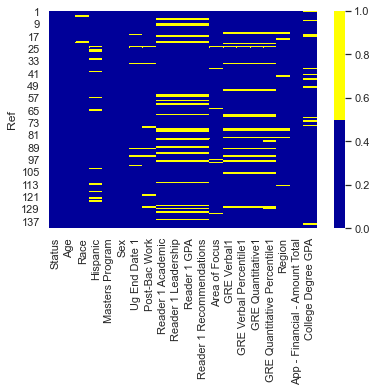

In [225]:
cols = df.columns
colours = ['#000099', '#ffff00']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [226]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Status - 0%
Age - 0%
Race - 1%
Hispanic - 9%
Masters Program - 0%
Sex - 0%
Ug End Date 1 - 4%
Post-Bac Work - 5%
Reader 1 Academic - 16%
Reader 1 Leadership - 16%
Reader 1 GPA - 16%
Reader 1 Recommendations - 16%
Area of Focus - 4%
GRE Verbal1 - 11%
GRE Verbal Percentile1 - 11%
GRE Quantitative1 - 11%
GRE Quantitative Percentile1 - 12%
Region - 5%
App - Financial - Amount Total - 0%
College Degree GPA - 9%


created missing indicator for: Race
created missing indicator for: Hispanic
created missing indicator for: Ug End Date 1
created missing indicator for: Post-Bac Work
created missing indicator for: Reader 1 Academic
created missing indicator for: Reader 1 Leadership
created missing indicator for: Reader 1 GPA
created missing indicator for: Reader 1 Recommendations
created missing indicator for: Area of Focus
created missing indicator for: GRE Verbal1
created missing indicator for: GRE Verbal Percentile1
created missing indicator for: GRE Quantitative1
created missing indicator for: GRE Quantitative Percentile1
created missing indicator for: Region
created missing indicator for: College Degree GPA


<AxesSubplot:xlabel='index'>

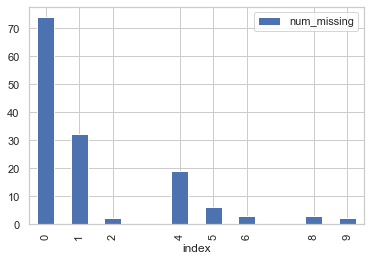

In [227]:
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')


In [228]:
ind_missing = df[df['num_missing'] > 35].index
df_less_missing_rows = df.drop(ind_missing, axis=0)
df_less_missing_rows

,Status,Age,Race,Hispanic,Masters Program,Sex,Ug End Date 1,Post-Bac Work,Reader 1 Academic,Reader 1 Leadership,...,Reader 1 GPA_ismissing,Reader 1 Recommendations_ismissing,Area of Focus_ismissing,GRE Verbal1_ismissing,GRE Verbal Percentile1_ismissing,GRE Quantitative1_ismissing,GRE Quantitative Percentile1_ismissing,Region_ismissing,College Degree GPA_ismissing,num_missing
Ref,,,,,,,,,,,,,,,,,,,,,
1,1,28,White,No,Master of Public Policy (MPP) Studies Program,M,2012-05-01,3 years,B,C,...,False,False,False,False,False,False,False,False,True,1
2,1,28,White,No,Master of Public Policy (MPP) Studies Program,M,2011-05-01,4 years,C,B,...,False,False,False,False,False,False,False,False,False,0
3,1,29,"Asian, Asian - Indian, Asian - Other Asian",No,Master of Public Policy (MPP) Studies Program,M,2010-08-01,4 years,B,A,...,False,False,False,False,False,False,False,False,False,0
4,1,28,NaN,No,Master of Public Policy (MPP) Studies Program,F,2011-05-01,3-5 years,A,A,...,False,False,False,False,False,False,False,False,False,1
5,0,31,White,No,Master of Science in Computational Analysis an...,M,2009-05-01,5 years,B,C,...,False,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,0,29,White,No,Master of Public Policy (MPP) Studies Program,F,2011-05-01,3-5 years,B,A,...,False,False,False,False,False,False,False,False,False,0
138,1,26,White,No,Master of Public Policy (MPP) Studies Program,F,2014-05-01,0-1 years,B,B,...,False,False,False,False,False,False,False,False,False,0
139,0,22,"Asian, Asian - Chinese",No,Master of Science in Computational Analysis an...,F,2015-06-01,1 year,B,C,...,False,False,False,False,False,False,False,False,True,1


**2 Clean unstructural data into numerical data**

In [627]:
#Clean 'Ug End Date' into Year data
df['Ug End Date 1'] = df['Ug End Date 1'].astype(str)
df['Ug End Year'] = df['Ug End Date 1'].str.slice(0,4)

In [628]:
#Clean 'Post-Bac Work' into int
df['Post-Bac Work'] = df['Post-Bac Work'].str.extract("([-+]?\d*\.\d+|[-+]?\d+)").astype(float)

In [629]:
#Map Yes into 1 and No into 0
df['Hispanic']=df['Hispanic'].replace({'No':0,'Yes':1})

In [630]:
# Convert letter grades into numeric
#A into 2, B into 1, C into 0
df['Reader 1 Academic'] = df['Reader 1 Academic'].replace({'A':2,'B':1,'C':0})
df['Reader 1 Leadership'] = df['Reader 1 Leadership'].replace({'A':2,'B':1,'C':0})
df['Reader 1 GPA'] = df['Reader 1 GPA'].replace({'A':3,'B':2,'C':1,'D':0})
df['Reader 1 Recommendations'] = df['Reader 1 Recommendations'].replace({'A':2,'B':1,'C':0})

In [72]:
def race_data(race):
    if race == 'White':
        race = 1
    if race =='Black':
        race = 2
    #if 'Asian' in race:
        #race = 3
    if race == 'I prefer not to respond.':
        race = 0
    if race == 'Other':
        race = 4

In [631]:
#clean Race columns into numerical data
df['Race'] = df['Race'].str.split(',',expand=True)[0]
df['Race'] = df['Race'].replace({'White':1,'Black':2,'Asian':3,'I prefer not to respond.':0,'Other':4,'American Indian or Alaska Native - Chippewa, Native':5,"American Indian or Alaska Native - Other Native American, Native":5})

In [632]:
df['Sex'] = df['Sex'].replace({'M':1,'F':0})

In [633]:
df['App - Financial - Amount Total'] = df['App - Financial - Amount Total'].str.extract("([-+]?\d*\.\d+|[-+]?\d+)").astype(float)

In [634]:
df.head()

,Status,Age,Race,Hispanic,Masters Program,Sex,Ug End Date 1,Post-Bac Work,Reader 1 Academic,Reader 1 Leadership,...,Reader 1 Recommendations,Area of Focus,GRE Verbal1,GRE Verbal Percentile1,GRE Quantitative1,GRE Quantitative Percentile1,Region,App - Financial - Amount Total,College Degree GPA,Ug End Year
Ref,,,,,,,,,,,,,,,,,,,,,
1,1,28,1,0.0,Master of Public Policy (MPP) Studies Program,1,2012-05-01,3.0,1.0,0.0,...,1.0,Other,163.0,92.0,160.0,76.0,NY,0.0,NaN,2012
2,1,28,1,0.0,Master of Public Policy (MPP) Studies Program,1,2011-05-01,4.0,0.0,1.0,...,1.0,Education Policy,166.0,97.0,161.0,79.0,IL,0.0,3.590,2011
3,1,29,3,0.0,Master of Public Policy (MPP) Studies Program,1,2010-08-01,4.0,1.0,2.0,...,2.0,International Policy,155.0,68.0,160.0,76.0,IL,0.0,3.790,2010
4,1,28,NaN,0.0,Master of Public Policy (MPP) Studies Program,0,2011-05-01,3.0,2.0,2.0,...,1.0,Social Policy and Inequality,160.0,85.0,162.0,82.0,MA,0.0,3.321,2011
5,0,31,1,0.0,Master of Science in Computational Analysis an...,1,2009-05-01,5.0,1.0,0.0,...,1.0,Education Policy,169.0,99.0,170.0,97.0,CT,0.0,3.510,2009


1.2. Deal with outliers

In [817]:
df_new.head()

,Status,Age,Race,Hispanic,Masters Program,Sex,Ug End Date 1,Post-Bac Work,Reader 1 Academic,Reader 1 Leadership,...,GRE Quantitative Percentile1,Region,App - Financial - Amount Total,College Degree GPA,Ug End Year,MastersProgram,PBWork,RAcademic,RGPA,RLeadership
Ref,,,,,,,,,,,,,,,,,,,,,
2,1,28,1,0.0,Master of Public Policy (MPP) Studies Program,1,2011-05-01,4.0,0.0,1.0,...,79.0,IL,0.0,3.590,2011,Master of Public Policy (MPP) Studies Program,4.0,0.0,2.0,1.0
3,1,29,3,0.0,Master of Public Policy (MPP) Studies Program,1,2010-08-01,4.0,1.0,2.0,...,76.0,IL,0.0,3.790,2010,Master of Public Policy (MPP) Studies Program,4.0,1.0,3.0,2.0
4,1,28,NaN,0.0,Master of Public Policy (MPP) Studies Program,0,2011-05-01,3.0,2.0,2.0,...,82.0,MA,0.0,3.321,2011,Master of Public Policy (MPP) Studies Program,3.0,2.0,1.0,2.0
5,0,31,1,0.0,Master of Science in Computational Analysis an...,1,2009-05-01,5.0,1.0,0.0,...,97.0,CT,0.0,3.510,2009,Master of Science in Computational Analysis an...,5.0,1.0,2.0,0.0
6,0,26,1,0.0,Master of Public Policy (MPP) Studies Program,1,2013-12-01,1.0,NaN,NaN,...,76.0,CA,0.0,2.840,2013,Master of Public Policy (MPP) Studies Program,1.0,NaN,NaN,NaN


In [636]:
#Drop the value if GPA is larger than 5
df_new = df[df['College Degree GPA'] <= 5]
len(df_new)

127

# Exploratory Data Analysis

In [635]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [638]:
df_new['Status'].value_counts()

0    66
1    61
Name: Status, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

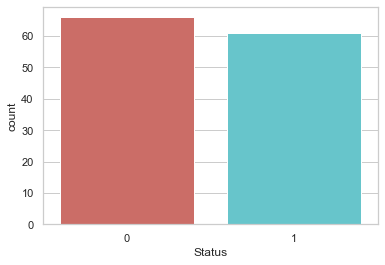

In [639]:
sns.countplot(x='Status',data=df_new,palette = 'hls')
plt.show

In [640]:
df_new.groupby('Status').mean()

,Age,Hispanic,Sex,Post-Bac Work,Reader 1 Academic,Reader 1 Leadership,Reader 1 GPA,Reader 1 Recommendations,GRE Verbal1,GRE Verbal Percentile1,GRE Quantitative1,GRE Quantitative Percentile1,App - Financial - Amount Total,College Degree GPA
Status,,,,,,,,,,,,,,
0,27.818182,0.103448,0.530303,2.676923,0.945455,0.800000,1.890909,1.181818,184.370968,85.983871,186.483871,71.596774,5985.439394,3.534000
1,27.508197,0.140351,0.475410,2.800000,1.134615,0.923077,1.903846,1.096154,171.540000,87.080000,169.820000,69.918367,4838.049180,3.507295


Observations:
1. Age: the average age of those who choose to attend Harris and those who do not are similiar;
2. Reader Academic and Leadership is higher for those who choose to attend Harris, while Reader Recommendations are lower for those who choose to attend;
3. GRE and GPA: GRE and GPA are similiar in two groups

In [641]:
df_new.groupby('Masters Program').mean()

,Status,Age,Hispanic,Sex,Post-Bac Work,Reader 1 Academic,Reader 1 Leadership,Reader 1 GPA,Reader 1 Recommendations,GRE Verbal1,GRE Verbal Percentile1,GRE Quantitative1,GRE Quantitative Percentile1,App - Financial - Amount Total,College Degree GPA
Masters Program,,,,,,,,,,,,,,,
BA-MSCAPP Program,0.750000,22.000000,0.000000,0.750000,NaN,1.250000,0.750000,2.000000,1.000000,NaN,NaN,NaN,NaN,6250.000000,3.620000
Master of Arts (MA) Program (1 Year),0.800000,31.200000,0.100000,0.600000,4.300000,1.333333,0.666667,2.666667,1.000000,243.000000,89.500000,251.000000,68.000000,7502.000000,3.467800
Master of Arts in Public Policy with Certificate in Research Methods (MACRM),0.500000,29.250000,0.000000,0.500000,2.250000,1.333333,1.000000,2.000000,1.000000,160.333333,85.666667,161.000000,78.666667,3125.000000,3.660000
Master of Public Policy (MPP) Studies Program,0.407895,27.842105,0.101449,0.513158,2.716216,0.969697,1.000000,1.848485,1.136364,167.802817,85.943662,166.450704,68.690141,5001.355263,3.505566
Master of Science in Computational Analysis and Public Policy (MSCAPP),0.388889,27.666667,0.125000,0.444444,2.555556,0.937500,0.500000,2.062500,1.125000,217.111111,89.888889,222.611111,76.588235,5695.111111,3.617667
Master of Science in Environmental Science and Policy (MSESP),0.500000,28.375000,0.125000,0.250000,3.500000,1.000000,0.250000,1.500000,0.750000,158.875000,79.625000,158.000000,69.125000,6250.625000,3.470000
Professional Option (For Current UChicago College Students only),0.857143,22.285714,0.500000,0.571429,0.166667,1.571429,1.142857,2.000000,1.857143,162.666667,89.000000,162.500000,81.500000,6431.428571,3.441429


In [642]:
df_new.groupby('Area of Focus').mean()

,Status,Age,Hispanic,Sex,Post-Bac Work,Reader 1 Academic,Reader 1 Leadership,Reader 1 GPA,Reader 1 Recommendations,GRE Verbal1,GRE Verbal Percentile1,GRE Quantitative1,GRE Quantitative Percentile1,App - Financial - Amount Total,College Degree GPA
Area of Focus,,,,,,,,,,,,,,,
Child and Family Policy,0.600000,26.600000,0.000000,0.000000,2.000000,0.800000,1.000000,2.000000,1.000000,162.600000,89.800000,157.200000,66.800000,2501.000000,3.646000
Cultural Policy,0.500000,25.000000,0.000000,0.500000,0.000000,1.000000,0.500000,2.500000,1.500000,168.000000,98.000000,163.000000,85.000000,13750.000000,3.602500
Economic Policy and Public Finance,0.500000,30.750000,0.142857,0.375000,4.000000,1.125000,0.875000,1.750000,0.750000,160.600000,85.800000,158.000000,68.200000,5312.500000,3.534500
Education Policy,0.444444,27.055556,0.200000,0.666667,2.500000,1.000000,0.941176,1.764706,1.117647,161.722222,86.555556,160.888889,76.055556,4027.777778,3.470556
"Energy, Environmental, and Science Policy",0.444444,29.333333,0.111111,0.444444,4.222222,1.000000,0.285714,1.571429,0.857143,159.888889,82.666667,158.444444,70.666667,7778.333333,3.503111
Global Security,0.000000,26.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,155.000000,68.000000,154.000000,55.000000,20000.000000,3.330000
Heath Policy,0.272727,30.454545,0.000000,0.545455,3.454545,0.714286,0.857143,2.000000,1.142857,228.571429,91.857143,239.857143,65.428571,7275.181818,3.633818
International Policy,0.777778,26.666667,0.000000,0.444444,2.500000,0.857143,0.714286,1.857143,1.000000,221.125000,84.375000,229.625000,72.875000,1388.888889,3.537889
"Organizations, Institutions, and Management",0.500000,27.000000,0.000000,0.500000,2.000000,1.000000,2.000000,2.000000,2.000000,165.000000,92.000000,157.500000,67.000000,6250.000000,3.248000


<ipython-input-643-5f00e264439f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['MastersProgram'] = df_new['Masters Program']


Text(0.5, 1.0, 'Status of Attending Harris by Master Program')

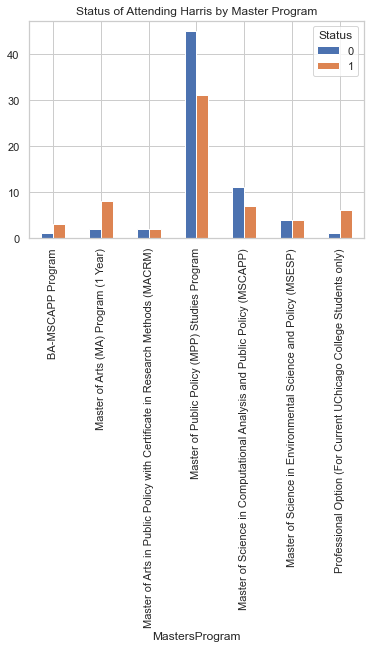

In [643]:
df_new['MastersProgram'] = df_new['Masters Program']
pd.crosstab(df_new.MastersProgram,df_new.Status).plot(kind='bar')
plt.title('Status of Attending Harris by Master Program')

<AxesSubplot:xlabel='Age'>

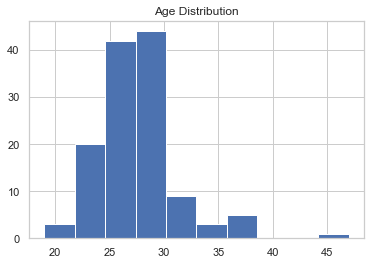

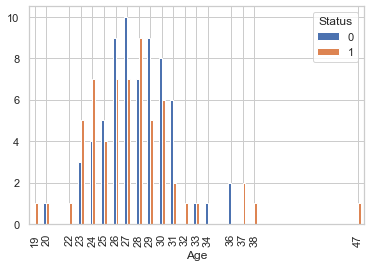

In [644]:
df_new.Age.hist()
plt.title('Age Distribution')
pd.crosstab(df_new.Age,df_new.Status).plot(kind='bar')

<ipython-input-645-ceb274d15810>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['PBWork'] = df_new['Post-Bac Work']


Text(0.5, 1.0, 'Post Bachelor Work Experience and Attending Rate')

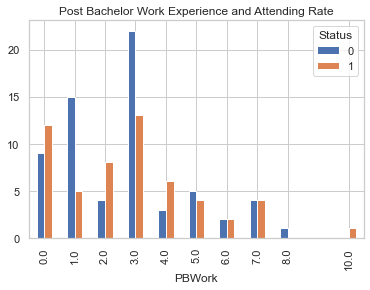

In [645]:
df_new['PBWork'] = df_new['Post-Bac Work']
pd.crosstab(df_new.PBWork,df_new.Status).plot(kind='bar')
plt.title("Post Bachelor Work Experience and Attending Rate")

<ipython-input-646-38411de553d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['RAcademic'] = df_new['Reader 1 Academic']
<ipython-input-646-38411de553d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['RGPA'] = df_new['Reader 1 GPA']
<ipython-input-646-38411de553d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

<AxesSubplot:xlabel='RLeadership'>

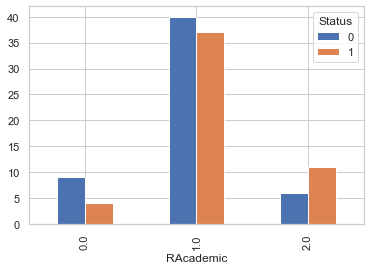

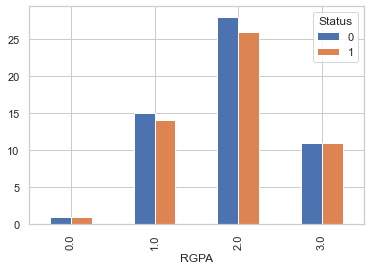

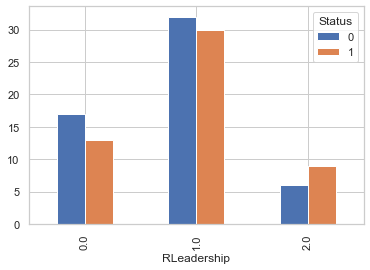

In [646]:
df_new['RAcademic'] = df_new['Reader 1 Academic']
df_new['RGPA'] = df_new['Reader 1 GPA']
df_new['RLeadership'] = df_new['Reader 1 Leadership']
pd.crosstab(df_new.RAcademic,df_new.Status).plot(kind='bar')
pd.crosstab(df_new.RGPA,df_new.Status).plot(kind='bar')
pd.crosstab(df_new.RLeadership,df_new.Status).plot(kind='bar')

In [647]:
df_new.head()

,Status,Age,Race,Hispanic,Masters Program,Sex,Ug End Date 1,Post-Bac Work,Reader 1 Academic,Reader 1 Leadership,...,GRE Quantitative Percentile1,Region,App - Financial - Amount Total,College Degree GPA,Ug End Year,MastersProgram,PBWork,RAcademic,RGPA,RLeadership
Ref,,,,,,,,,,,,,,,,,,,,,
2,1,28,1,0.0,Master of Public Policy (MPP) Studies Program,1,2011-05-01,4.0,0.0,1.0,...,79.0,IL,0.0,3.590,2011,Master of Public Policy (MPP) Studies Program,4.0,0.0,2.0,1.0
3,1,29,3,0.0,Master of Public Policy (MPP) Studies Program,1,2010-08-01,4.0,1.0,2.0,...,76.0,IL,0.0,3.790,2010,Master of Public Policy (MPP) Studies Program,4.0,1.0,3.0,2.0
4,1,28,NaN,0.0,Master of Public Policy (MPP) Studies Program,0,2011-05-01,3.0,2.0,2.0,...,82.0,MA,0.0,3.321,2011,Master of Public Policy (MPP) Studies Program,3.0,2.0,1.0,2.0
5,0,31,1,0.0,Master of Science in Computational Analysis an...,1,2009-05-01,5.0,1.0,0.0,...,97.0,CT,0.0,3.510,2009,Master of Science in Computational Analysis an...,5.0,1.0,2.0,0.0
6,0,26,1,0.0,Master of Public Policy (MPP) Studies Program,1,2013-12-01,1.0,NaN,NaN,...,76.0,CA,0.0,2.840,2013,Master of Public Policy (MPP) Studies Program,1.0,NaN,NaN,NaN


# Cleaning Missing Data

##### select variables
select_vars = ['Status','Age','Race','Sex',
               'PBWork','RAcademic','RGPA','RLeadership','Reader 1 Recommendations',
               'College Degree GPA','App - Financial - Amount Total',
               'GRE Verbal Percentile1','GRE Quantitative Percentile1']
columns = df_new.columns.values.tolist()
columns

In [648]:
total_columns = df_new.columns.values.tolist()
Y_vars = ['Status']
X_vars = select_vars

In [649]:
df_new_Y = df_new.iloc[:,0]
df_new_X = df_new[select_vars]

In [650]:
a = df_new_X['Race'][12]
b = df_new_X['Race'][96]
c = df_new_X['Race'][108]
nan = df_new_X['Race'][4]

In [339]:
df_new_X['Race'][4]

nan

In [651]:
df_new_X['Race'] = df_new_X['Race'].replace({a:5,b:5,c:5,nan:0})

<ipython-input-651-a4bf6761a502>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_X['Race'] = df_new_X['Race'].replace({a:5,b:5,c:5,nan:0})


In [818]:
df_new_Y = pd.DataFrame(df_new_Y,columns=['Ref','Status'])

In [653]:
df_new_X

,Status,Age,Race,Sex,PBWork,RAcademic,RGPA,RLeadership,Reader 1 Recommendations,College Degree GPA,App - Financial - Amount Total,GRE Verbal Percentile1,GRE Quantitative Percentile1
Ref,,,,,,,,,,,,,
2,1,28,1,1,4.0,0.0,2.0,1.0,1.0,3.590,0.0,97.0,79.0
3,1,29,3,1,4.0,1.0,3.0,2.0,2.0,3.790,0.0,68.0,76.0
4,1,28,0,0,3.0,2.0,1.0,2.0,1.0,3.321,0.0,85.0,82.0
5,0,31,1,1,5.0,1.0,2.0,0.0,1.0,3.510,0.0,99.0,97.0
6,0,26,1,1,1.0,NaN,NaN,NaN,NaN,2.840,0.0,90.0,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,0,24,1,1,1.0,NaN,NaN,NaN,NaN,3.910,0.0,87.0,80.0
137,0,29,1,0,3.0,1.0,2.0,2.0,2.0,3.550,0.0,95.0,85.0
138,1,26,1,0,0.0,1.0,2.0,1.0,1.0,3.870,0.0,95.0,59.0


In [654]:
for col in df_new_X.columns:
    pct_missing = np.mean(df_new_X[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Status - 0%
Age - 0%
Race - 0%
Sex - 0%
PBWork - 6%
RAcademic - 16%
RGPA - 16%
RLeadership - 16%
Reader 1 Recommendations - 16%
College Degree GPA - 0%
App - Financial - Amount Total - 0%
GRE Verbal Percentile1 - 12%
GRE Quantitative Percentile1 - 13%


In [655]:
df_new2 = df_new_X

In [656]:
df_new2.dropna(axis=0, how='all', subset=['RAcademic'], inplace=True)

<ipython-input-656-fc39b7eaa9b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new2.dropna(axis=0, how='all', subset=['RAcademic'], inplace=True)


In [657]:
df_new2.dropna(axis=0, how='all', subset=['RLeadership'], inplace=True)

<ipython-input-657-7b09c63088e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new2.dropna(axis=0, how='all', subset=['RLeadership'], inplace=True)


In [658]:
df_new2.dropna(axis=0, how='all', subset=['RGPA'], inplace=True)

<ipython-input-658-c35fd4f1747b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new2.dropna(axis=0, how='all', subset=['RGPA'], inplace=True)


In [659]:
df_new2.dropna(axis=0, how='all', subset=['Race'], inplace=True)

<ipython-input-659-477ffaaa325c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new2.dropna(axis=0, how='all', subset=['Race'], inplace=True)


In [661]:
for col in df_new_X2.columns:
    pct_missing = np.mean(df_new_X2[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Age - 0%
Race - 0%
Sex - 0%
PBWork - 7%
RAcademic - 0%
RGPA - 0%
RLeadership - 0%
Reader 1 Recommendations - 0%
Ug End Year - 0%
College Degree GPA - 0%
App - Financial - Amount Total - 0%
GRE Verbal Percentile1 - 10%
GRE Quantitative Percentile1 - 11%


In [662]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [663]:
df_vars = df_new2[select_vars]
df_vars.head()

,Status,Age,Race,Sex,PBWork,RAcademic,RGPA,RLeadership,Reader 1 Recommendations,College Degree GPA,App - Financial - Amount Total,GRE Verbal Percentile1,GRE Quantitative Percentile1
Ref,,,,,,,,,,,,,
2,1,28,1,1,4.0,0.0,2.0,1.0,1.0,3.590,0.0,97.0,79.0
3,1,29,3,1,4.0,1.0,3.0,2.0,2.0,3.790,0.0,68.0,76.0
4,1,28,0,0,3.0,2.0,1.0,2.0,1.0,3.321,0.0,85.0,82.0
5,0,31,1,1,5.0,1.0,2.0,0.0,1.0,3.510,0.0,99.0,97.0
8,1,24,1,0,1.0,1.0,1.0,0.0,0.0,3.408,0.0,72.0,70.0


In [664]:
df_new2['Race'] = df_new2['Race'].replace({a:5,b:5,c:5,nan:0})

<ipython-input-664-7e001c51686e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new2['Race'] = df_new2['Race'].replace({a:5,b:5,c:5,nan:0})


In [672]:
df_new2.dropna(axis=0, how='all', subset=['GRE Verbal Percentile1'], inplace=True)

<ipython-input-672-abfa6cf7840c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new2.dropna(axis=0, how='all', subset=['GRE Verbal Percentile1'], inplace=True)


In [699]:
df_new2.dropna(axis=0, how='all', subset=['GRE Quantitative Percentile1'], inplace=True)

<ipython-input-699-45684327b18a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new2.dropna(axis=0, how='all', subset=['GRE Quantitative Percentile1'], inplace=True)


In [700]:
df_new2.dropna(axis=0, how='all', subset=['PBWork'], inplace=True)

<ipython-input-700-6775f8ea658b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new2.dropna(axis=0, how='all', subset=['PBWork'], inplace=True)


In [701]:
df_new2

,Status,Age,Race,Sex,PBWork,RAcademic,RGPA,RLeadership,Reader 1 Recommendations,College Degree GPA,App - Financial - Amount Total,GRE Verbal Percentile1,GRE Quantitative Percentile1
Ref,,,,,,,,,,,,,
2,1,28,1,1,4.0,0.0,2.0,1.0,1.0,3.590,0.0,97.0,79.0
3,1,29,3,1,4.0,1.0,3.0,2.0,2.0,3.790,0.0,68.0,76.0
4,1,28,0,0,3.0,2.0,1.0,2.0,1.0,3.321,0.0,85.0,82.0
5,0,31,1,1,5.0,1.0,2.0,0.0,1.0,3.510,0.0,99.0,97.0
8,1,24,1,0,1.0,1.0,1.0,0.0,0.0,3.408,0.0,72.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,1,28,1,0,3.0,1.0,2.0,0.0,0.0,3.960,0.0,94.0,51.0
137,0,29,1,0,3.0,1.0,2.0,2.0,2.0,3.550,0.0,95.0,85.0
138,1,26,1,0,0.0,1.0,2.0,1.0,1.0,3.870,0.0,95.0,59.0


In [702]:
total_columns = df_new2.columns.values.tolist()
X_columns = [i for i in total_columns if i != 'Status']
df_new_X2 = df_new2[X_columns]

In [703]:
#split training and testing data
from sklearn.model_selection import train_test_split
y_train, y_test, x_train, x_test = train_test_split(df_new2.Status, df_new_X2, test_size=0.25, random_state=0)

In [735]:
x_array_train = x_train.values
y_array_train = y_train.to_numpy()

x_array_test = x_test.values
y_array_test = y_test.values

x_array = df_new_X2.values
y_array = df_new2.Status.values

# Feature Selection

In [736]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x_array,y_array)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df_new_X2.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores

,Specs,Score
0,Age,0.002803
1,Race,0.027318
2,Sex,0.086402
3,PBWork,0.232075
4,RAcademic,0.262710
5,RGPA,0.188624
6,RLeadership,1.135084
7,Reader 1 Recommendations,0.097717
8,College Degree GPA,0.024349
9,App - Financial - Amount Total,30727.893391


In [737]:
print(featureScores.nlargest(5,'Score'))  

                             Specs         Score
9   App - Financial - Amount Total  30727.893391
11    GRE Quantitative Percentile1      2.398146
6                      RLeadership      1.135084
10          GRE Verbal Percentile1      0.402334
4                        RAcademic      0.262710


In [739]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x_array,y_array)
print(model.feature_importances_)

[0.11292144 0.06213144 0.04631375 0.09278882 0.05399032 0.06543647
 0.06211471 0.08925715 0.10321938 0.11274462 0.10017133 0.09891058]


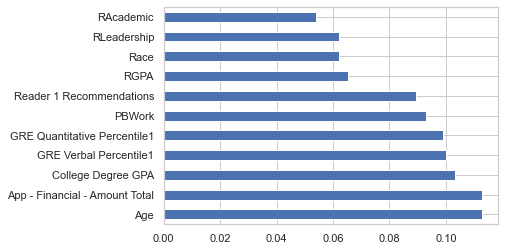

In [742]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=df_new_X2.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

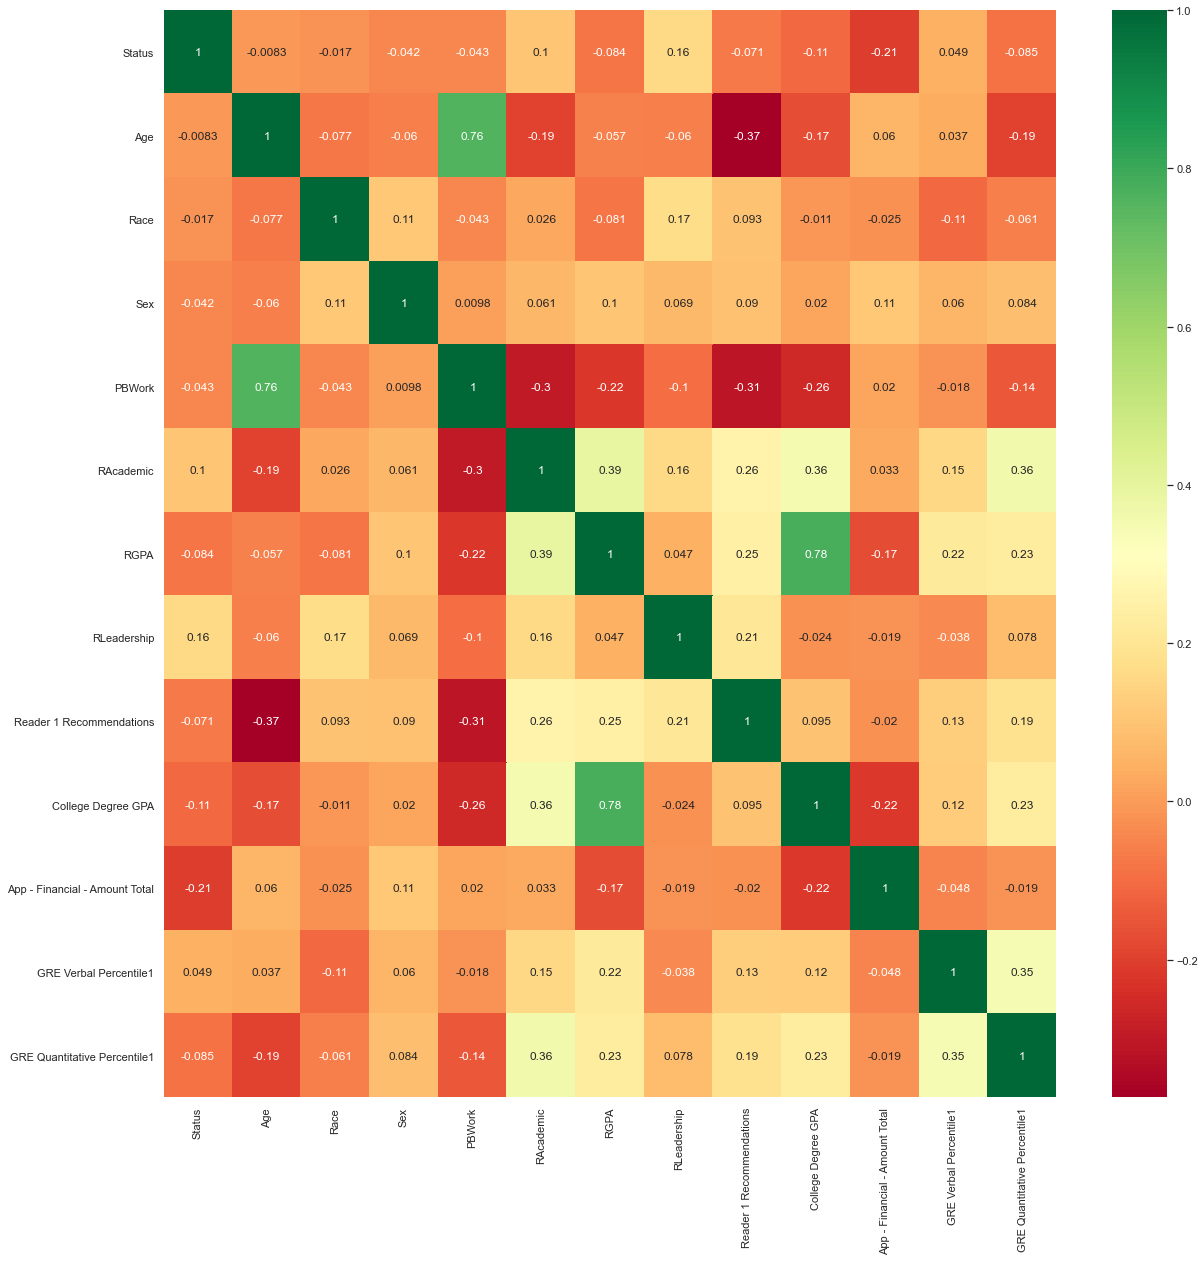

In [745]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df_new2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_new2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Conclusion of feature selection: according to the importance score and correlation, I tend to keep 9 variables:
1. I tend to keep 'Age' as a variable and drop 'PBWork (Post Bachelor Work)' since age has higher importance score and highly correlated with PBWork, which might cause overfitting.

2. I tend to keep 'College Degree GPA' and drop 'RGPA' for the same reason. 

# Logistic Regression

In [753]:
df_new3 = df_new2[['Status','Age','Race','Sex','RAcademic','RLeadership',
                  'Reader 1 Recommendations','App - Financial - Amount Total',
                  'GRE Verbal Percentile1','GRE Quantitative Percentile1']]

df_new_X3 = df_new2[['Age','Race','Sex','RAcademic','RLeadership',
                  'Reader 1 Recommendations','App - Financial - Amount Total',
                  'GRE Verbal Percentile1','GRE Quantitative Percentile1']]

In [762]:
#split training and testing data
from sklearn.model_selection import train_test_split
y_train, y_test, x_train, x_test = train_test_split(df_new3.Status, df_new_X3, test_size=0.4, random_state=0)

In [763]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train,y_train)

C:\Users\Louisa Zhao\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [764]:
y_pred=logisticRegr.predict(x_test)

In [765]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[13, 10],
       [ 7,  8]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

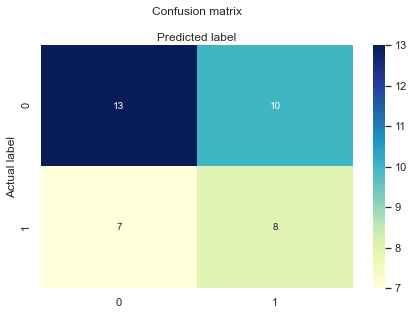

In [771]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [766]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.5526315789473685
Precision: 0.4444444444444444
Recall: 0.5333333333333333


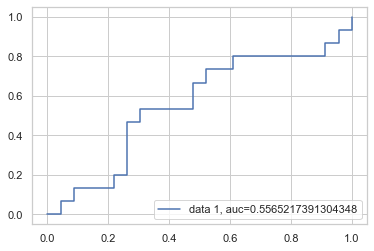

In [769]:
y_pred_proba = logisticRegr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Cross-validation

Here I consider cross-validation because the dataset is relatively small after dropping the null data. The reason why I do not consider the missing data imputing is that the cross validation could "squeeze" and make the best use of data by spliting into several folds.

In [790]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(cv=10, random_state=0).fit(x_train, y_train)
clf.predict(x_test)
clf.score(x_train, y_train)

scores = cross_val_score(logisticRegr, x_train, y_train, cv=10)
scores = pd.Series(scores)
print('Cross-Validation Accuracy Scores', scores)

C:\Users\Louisa Zhao\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Louisa Zhao\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

Cross-Validation Accuracy Scores 0    0.166667
1    0.500000
2    0.500000
3    0.833333
4    0.333333
5    0.800000
6    0.600000
7    0.600000
8    0.400000
9    0.600000
dtype: float64


C:\Users\Louisa Zhao\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [791]:
scores.min(), scores.mean(), scores.max()

(0.16666666666666666, 0.5333333333333333, 0.8333333333333334)

# KNN - Classification

In [812]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

print(knn.predict(x_test))

[0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0
 0]


In [811]:
print(knn.score(x_test, y_test))

0.5263157894736842


In [816]:
#tuning parameters
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)

    print("When number of neigbhors is:",i)
    knn.predict(x_test)
    print(knn.score(x_test, y_test))

When number of neigbhors is: 1
0.4473684210526316
When number of neigbhors is: 2
0.5789473684210527
When number of neigbhors is: 3
0.5789473684210527
When number of neigbhors is: 4
0.5789473684210527
When number of neigbhors is: 5
0.5526315789473685
When number of neigbhors is: 6
0.5526315789473685
When number of neigbhors is: 7
0.5263157894736842
When number of neigbhors is: 8
0.5
When number of neigbhors is: 9
0.5263157894736842


In [826]:
from sklearn.model_selection import cross_val_score
knn_cv = KNeighborsClassifier(n_neighbors=3)
cv_scores = cross_val_score(knn_cv, x_train, y_train, cv=5)

print(cv_scores)
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.27272727 0.36363636 0.54545455 0.63636364 0.45454545]
[0.27272727 0.36363636 0.54545455 0.63636364 0.45454545]
cv_scores mean:0.4545454545454545
